In [1]:
MAC=False
if MAC: 
    rootf = '/Users'
else:
    rootf = '/home'

In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
# %load_ext autotime

Populating the interactive namespace from numpy and matplotlib


In [3]:
import os as os
import sys
sys.path.append('./extraction_functions') #this is where we put all the functions.py
sys.path.append('./../../functions_PVA') #this is where we put all the functions.py
#from brpylib import *

import matplotlib.pyplot as plt
from numpy               import arange


from extract_triggers import *

from save_load import *

# Load raw file to extract triggers

In [4]:
rawfiles = []
rawnames = []
rawcount=0

rawdir ='/media/eqs8/Samuele_01/Exp_17/recordings/'

#-----------------------------------------------
# Here I load all the pickles names
# we make the list of names, and the list of address to open
#-----------------------------------------------

rawfilesdata = getfiles(startdir=rawdir, phrase='.raw', function='endswith')
for rf in rawfilesdata:
    rawfiles.append(rf)

rawfiles = sorted(rawfiles)

for rf in rawfiles[:]:
    rawnames.append(((rf.split('/')[-1].split('-')[0:2])))

rawcount = len(rawfiles)
print(rawnames)   
rawfiles
np.where(np.array(rawnames)=='exp4')[0]
rawfiles

[['exp17', 'meas1'], ['exp17', 'meas2'], ['exp17', 'meas3'], ['exp17', 'meas4'], ['exp17', 'meas5'], ['exp17', 'meas6'], ['exp17', 'meas7'], ['exp17', 'meas8']]


['/media/eqs8/Samuele_01/Exp_17/recordings/exp17-meas1-20210608-check-30Hz-12px60ch.raw',
 '/media/eqs8/Samuele_01/Exp_17/recordings/exp17-meas2-20210608-check-30Hz-12px60ch.raw',
 '/media/eqs8/Samuele_01/Exp_17/recordings/exp17-meas3-20210608-Euler-50Hz.raw',
 '/media/eqs8/Samuele_01/Exp_17/recordings/exp17-meas4-20210608-fiandpwrc_8imgs1000reps.raw',
 '/media/eqs8/Samuele_01/Exp_17/recordings/exp17-meas5-20210608-check-30Hz-12px60ch.raw',
 '/media/eqs8/Samuele_01/Exp_17/recordings/exp17-meas6-20210608-fullFlash.raw',
 '/media/eqs8/Samuele_01/Exp_17/recordings/exp17-meas7-20210608-LAP4fiandpwrc_8imgs1000reps.raw',
 '/media/eqs8/Samuele_01/Exp_17/recordings/exp17-meas8-20210608-LAP4fiandpwrc_8imgs1000reps.raw']

In [5]:
exp = 17
nfiles = 8

meas_skip=5    # do only measurement N
SKIP= False

fs=20000

rootF = '/media/eqs8/Samuele_01/Exp_17/analysis/pckls_triggers/'
#the folder in which the pickles are to be saved

Fsave = rootF
indexes = np.where(np.array(rawnames)=='exp'+str(exp))[0]
mcount=0
for meas in indexes[0:]:
    mcount+=1
    
    #----------------------
    if SKIP:
        if mcount!=meas_skip: continue
    #----------------------
    
    f_base = rawfiles[meas]
    print(f_base)
    f_out = rootF + 'exp'+str(exp)+'-meas_0' + str(mcount) + '_triggers_unfilt'
    print(f_out)
    indices,data, t_tot =  extract(input_path=f_base , dtype='uint16', nb_channels=256, channel_id=126, output_path=None)
    
    print(len(indices),mean(indices))

    save_obj([indices,t_tot],f_out)
    save_obj(data,f_out+'_data')

print('Done!')

  0%|          | 0/37356000 [00:00<?, ?it/s]

/media/eqs8/Samuele_01/Exp_17/recordings/exp17-meas1-20210608-check-30Hz-12px60ch.raw
/media/eqs8/Samuele_01/Exp_17/analysis/pckls_triggers/exp17-meas_01_triggers_unfilt


100%|██████████| 37356000/37356000 [02:37<00:00, 237618.31it/s]


55700 18789776.436517056


  0%|          | 19930/21286000 [00:00<01:46, 199279.76it/s]

/media/eqs8/Samuele_01/Exp_17/recordings/exp17-meas2-20210608-check-30Hz-12px60ch.raw
/media/eqs8/Samuele_01/Exp_17/analysis/pckls_triggers/exp17-meas_02_triggers_unfilt


100%|██████████| 21286000/21286000 [01:37<00:00, 217844.18it/s]


31200 10691005.018141026


  0%|          | 7681/13508000 [00:00<02:55, 76767.61it/s]

/media/eqs8/Samuele_01/Exp_17/recordings/exp17-meas3-20210608-Euler-50Hz.raw
/media/eqs8/Samuele_01/Exp_17/analysis/pckls_triggers/exp17-meas_03_triggers_unfilt


100%|██████████| 13508000/13508000 [01:01<00:00, 218591.19it/s]


32400 6771839.754722223


  0%|          | 7125/146626000 [00:00<34:18, 71241.24it/s]

/media/eqs8/Samuele_01/Exp_17/recordings/exp17-meas4-20210608-fiandpwrc_8imgs1000reps.raw
/media/eqs8/Samuele_01/Exp_17/analysis/pckls_triggers/exp17-meas_04_triggers_unfilt


100%|██████████| 146626000/146626000 [11:04<00:00, 220737.26it/s]


292000 73533389.72510959


  0%|          | 1/26430000 [00:00<1829:44:49,  4.01it/s]

/media/eqs8/Samuele_01/Exp_17/recordings/exp17-meas5-20210608-check-30Hz-12px60ch.raw
/media/eqs8/Samuele_01/Exp_17/analysis/pckls_triggers/exp17-meas_05_triggers_unfilt


100%|██████████| 26430000/26430000 [02:21<00:00, 186427.97it/s]


39181 13323355.80710038


  0%|          | 9006/16618000 [00:00<03:04, 90057.08it/s]

/media/eqs8/Samuele_01/Exp_17/recordings/exp17-meas6-20210608-fullFlash.raw
/media/eqs8/Samuele_01/Exp_17/analysis/pckls_triggers/exp17-meas_06_triggers_unfilt


100%|██████████| 16618000/16618000 [01:17<00:00, 213790.05it/s]


45401 8704176.166450078


  0%|          | 7396/40599992 [00:00<09:08, 73950.90it/s]

/media/eqs8/Samuele_01/Exp_17/recordings/exp17-meas7-20210608-LAP4fiandpwrc_8imgs1000reps.raw
/media/eqs8/Samuele_01/Exp_17/analysis/pckls_triggers/exp17-meas_07_triggers_unfilt


100%|██████████| 40599992/40599992 [03:10<00:00, 212933.45it/s]


80392 20483483.078826252


  0%|          | 10497/146390000 [00:00<23:39, 103154.33it/s]

/media/eqs8/Samuele_01/Exp_17/recordings/exp17-meas8-20210608-LAP4fiandpwrc_8imgs1000reps.raw
/media/eqs8/Samuele_01/Exp_17/analysis/pckls_triggers/exp17-meas_08_triggers_unfilt


100%|██████████| 146390000/146390000 [10:55<00:00, 223449.14it/s]


292000 73315007.80466096
Done!


# Run Sanity Check

In [8]:
exp=17

nmeas=8

for meas in np.arange(nmeas)+1:
    
    print('Measurement ', meas)
    
    f=rootF + 'exp'+str(exp)+'-meas_0' + str(meas) + '_triggers_unfilt'

    indices, ttot = load_obj(f)
    indices.shape,ttot
    if meas==6 or meas==7:continue
    else:
        run_minimal_sanity_check(indices[:])
    # indices
    indices.shape

#save_obj([indices[1:],ttot],f)

Measurement  1
Minimal sanity check ok.
Measurement  2
Minimal sanity check ok.
Measurement  3
Minimal sanity check ok.
Measurement  4
Minimal sanity check ok.
Measurement  5
Minimal sanity check ok.
Measurement  6
Measurement  7
Measurement  8
Minimal sanity check ok.


In [12]:
#/home/matias/Dropbox/Drop-IdV/git-Perturbation/analysis/pert_DATA
rootF = rootf + '/matias/Dropbox/Drop-IdV/git-Perturbation/analysis/pert_DATA/pckls_triggers/'

f_out = rootF + 'exp'+str(exp)+'-meas_0' + str(mcount) + '_triggers_unfilt'
# save_obj([indices,t_tot],f_out)
# save_obj(data,f_out+'_data')

# Plot Data in case sanity check fails to correct it

In [11]:
# Get indices
exp=14
meas=4

f=rootF + 'exp'+str(exp)+'-meas_0' + str(meas) + '_triggers_unfilt'

indices, ttot = load_obj(f)
indices.shape,ttot

((55801,), 973.4)

array([  201,   200,   200, ...,   200,   200, 43798])

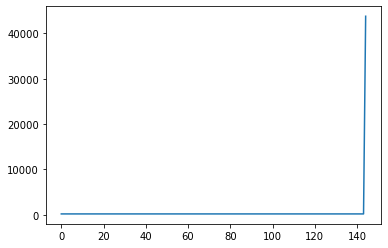

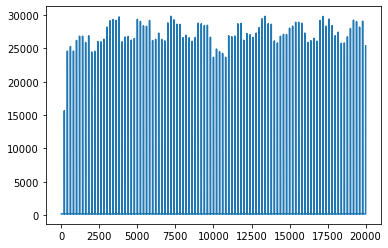

In [20]:
# Plot

plot(diff(indices)[-145:])

# print(np.where(diff(indices)>2000))
# print(diff(indices)[138300:138500])
figure()
plot(diff(indices)[0:20000])
indices
diff(indices)

In [44]:
# Get raw traces

exp=14

meas=4
f=rootf + '/matias/data/DATA_pert/sorted/exp'+str(exp)+'/exp'+str(exp)+'-meas_0'+str(meas)+'_triggers_unfilt_data'
f=rootf + '/matias/Dropbox/Drop-IdV/git-Perturbation/analysis/pert_DATA/pckls_triggers/exp'+str(exp)+'-meas_0'+str(meas)+'_triggers_unfilt_data'
indices2 = load_obj(f)
indices2.shape

(19468000,)

8000000


(500000.0, 3000000.0)

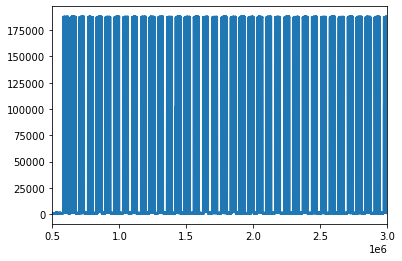

In [57]:
# Plot

fs=20000
x0=0*500 #+ int(0.5*1e+6) + 150000
plt.plot(indices2[x0:x0+fs*300])
print(16000*500)
xlim([1e6*0.5,1e6*3])

In [105]:
exp=3

meas=1
f='/media/matias/data/DATA_pert/sorted/exp'+str(exp)+'/exp'+str(exp)+'-meas_0'+str(meas)+'_triggers_unfilt'
indices, ttot = load_obj(f)
indices.shape,ttot
run_minimal_sanity_check(indices)
# indices
indices.shape

UserWarning: Triggers are not evenly spaced (some missing?).

array([667, 667, 666, ..., 667, 666, 667])

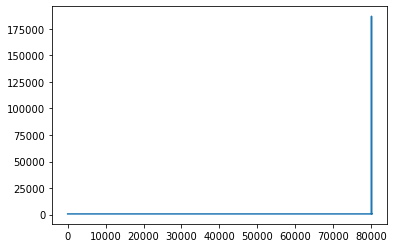

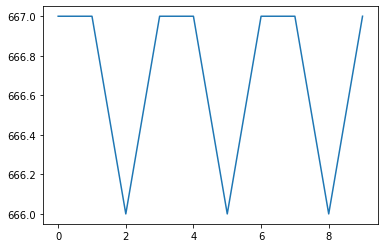

In [23]:
plot(diff(indices)[:])

# print(np.where(diff(indices)>2000))
# print(diff(indices)[138300:138500])
figure()
plot(diff(indices)[0:10])
indices
diff(indices)

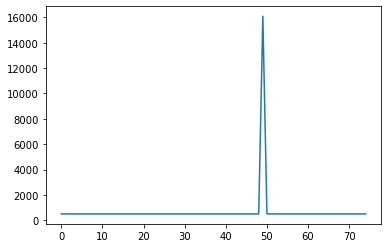

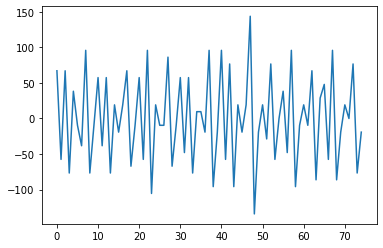

In [83]:
plot(diff(indices)[138350:138425])

# print(np.where(diff(indices)>2000))
# print(diff(indices)[138300:138500])
figure()
plot(diff(indices2)[138350:138425])

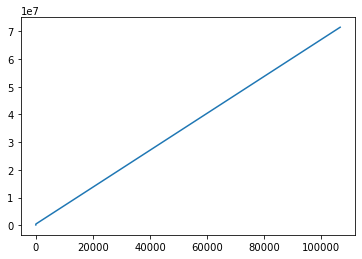

In [116]:
plot(indices)

In [117]:
exp=3

meas=1
f='/media/matias/data/DATA_pert/sorted/exp'+str(exp)+'/exp'+str(exp)+'-meas_0'+str(meas)+'_triggers_unfilt_data'
indices2 = load_obj(f)
indices2.shape
#run_minimal_sanity_check(indices2)
# indices


(71548000,)

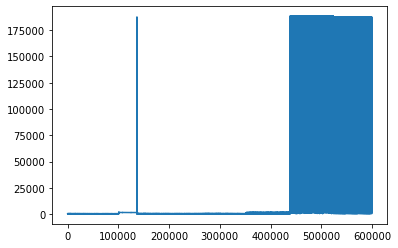

In [120]:
fs=20000
x0=0
plt.plot(indices2[x0:x0+fs*30])
#print(16000*500)

In [72]:
print(177600*500)

print(diff(indices).sum()/diff(indices).size)

print(177600*diff(indices).sum()/diff(indices).size)
span=177600*diff(indices).sum()/diff(indices).size

print(indices2.shape-span)
offset=int(indices2.shape-span)

88800000
500.08578877133317
88815236.08578877
[1232763.91421123]


In [59]:
start=0
for i,j in enumerate(diff(indices)):
    if i<138398:
        start+=j
        
start,x0

(69198726, 69195000)

In [79]:
indices2.shape

(90048000,)

In [91]:
x0/20000/60

58.20791666666666

In [ ]:
exp=7

meas=2
f='/media/matias/data/DATA_pert/sorted/exp'+str(exp)+'/exp'+str(exp)+'-meas_0'+str(meas)+'_triggers_unfilt'
indices, ttot = load_obj(f)
indices.shape,ttot
run_minimal_sanity_check(indices)
# indices
data.shape

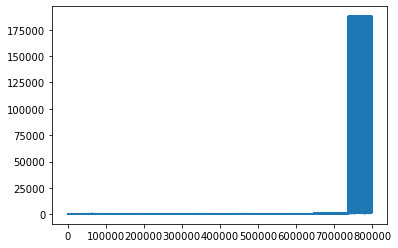

In [58]:
fs=20000
plot(data[0:fs*40])

In [13]:
t_tot

2336.7

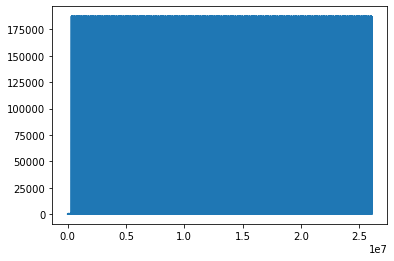

In [10]:
plot(data)

In [7]:
indexes

array([17, 18, 19, 20, 21, 22, 23, 24])

In [5]:
exp = 6
nfiles = 4

fs=20000

rootF = '/media/matias/data/DATA_pert/sorted/exp'+str(exp)+'/'

Fsave = rootF
indexes = np.where(np.array(rawnames)=='exp4')[0]
mcount=0
# for meas in indexes:
#     mcount+=1
#     f_base = rawfiles[meas]
#     print(f_base)
#     f_out = rootF + 'exp'+str(exp)+'-meas_0' + str(mcount) + '_triggers_unfilt'
#     print(f_out)
#     indices,data, t_tot =  extract(input_path=f_base , dtype='uint16', nb_channels=256, channel_id=126, output_path=None)
    
#     print(len(indices),mean(indices))

#     save_obj([indices,t_tot],f_out)
#     save_obj(data,f_out+'_data')

  0%|          | 1604/69236000 [00:00<1:11:56, 16039.48it/s]

/media/matias/Matias_data_1/DATA/RAW_EXTRACTED_DATA/exp4-meas1-20201030-check-30Hz-21px50ch.raw
/media/matias/data/DATA_pert/sorted/exp4/exp4-meas_01_triggers_unfilt


100%|██████████| 69236000/69236000 [1:00:50<00:00, 18966.50it/s]


103203 34784447.34717983


  0%|          | 1/13330000 [00:00<371:55:25,  9.96it/s]

/media/matias/Matias_data_1/DATA/RAW_EXTRACTED_DATA/exp4-meas2-20201029-Euler-50Hz.raw
/media/matias/data/DATA_pert/sorted/exp4/exp4-meas_02_triggers_unfilt


100%|██████████| 13330000/13330000 [08:01<00:00, 27684.28it/s]


32255 6842434.399596962


  0%|          | 257/102916000 [00:00<11:08:28, 2565.94it/s]

/media/matias/Matias_data_1/DATA/RAW_EXTRACTED_DATA/exp4-meas3-20201030-6stims1200reps.raw
/media/matias/data/DATA_pert/sorted/exp4/exp4-meas_03_triggers_unfilt


100%|██████████| 102916000/102916000 [1:08:30<00:00, 25037.83it/s] 


204000 51673240.949857846


  0%|          | 257/89794000 [00:00<11:29:45, 2169.68it/s]

/media/matias/Matias_data_1/DATA/RAW_EXTRACTED_DATA/exp4-meas4-20201030-12stims600reps.raw
/media/matias/data/DATA_pert/sorted/exp4/exp4-meas_04_triggers_unfilt


100%|██████████| 89794000/89794000 [16:12<00:00, 92332.17it/s] 


175200 44162139.986946344


In [10]:
# one false trigger in exp4 meas 1 (run once)

# exp = 4
# nfiles = 4

# fs=20000

# rootF = '/media/matias/data/DATA_pert/sorted/exp'+str(exp)+'/'

# Fsave = rootF

# f_out = rootF + 'exp'+str(4)+'-meas_0' + str(1) + '_triggers_unfilt'
# print(f_out)
# [indices,t_tot] = load_obj(f_out)

# indices = indices[1:]

# save_obj([indices,t_tot],f_out)



/media/matias/data/DATA_pert/sorted/exp4/exp4-meas_01_triggers_unfilt


In [9]:
indices

array([  113181,   384944,   385610, ..., 69183291, 69183957, 69184624])